In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dt = pd.read_csv('F:/Downloads/train.csv')


In [4]:
dt.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
l = dt['label']

In [7]:
d = dt.drop("label",axis=1)

In [8]:
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
d.shape

(42000, 784)

C:\Users\esc10\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


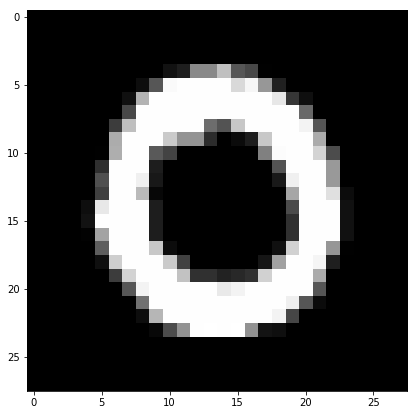

In [11]:
plt.figure(figsize=(7,7))
idx = 1

grid_data = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation="none", cmap="gray")

plt.show()

In [16]:
labels = l.head(15000)
data = d.head(15000)




In [14]:
labels.shape

(15000,)

In [17]:
data.shape

(15000, 784)

In [18]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)

In [23]:
standardized_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
sample_data = standardized_data

In [25]:
covar_matrix = np.matmul(sample_data.T, sample_data)

In [26]:
covar_matrix.shape

(784, 784)

In [27]:
from scipy.linalg import eigh


In [28]:
values, vectors = eigh(covar_matrix, eigvals=(782,783)) #ascending order of EV

In [29]:
vectors.shape

(784, 2)

In [30]:
vectors = vectors.T

In [31]:
new_coordinates  = np.matmul(vectors,sample_data.T)

In [33]:
new_coordinates = np.vstack((new_coordinates,labels)).T

In [35]:
dataframe = pd.DataFrame(data = new_coordinates,columns = ("1st_principal","2nd_principal",'label'))

In [36]:
dataframe.head()

,1st_principal,2nd_principal,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


In [37]:
import seaborn as sns

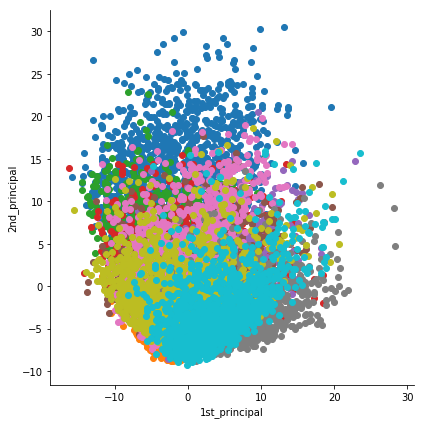

In [39]:
sns.FacetGrid(dataframe ,hue ="label",size=6).map(plt.scatter,'1st_principal','2nd_principal')
plt.show()

In [40]:
from sklearn import decomposition
pca = decomposition.PCA()

In [46]:
pca.n_components = 3
pca_data = pca.fit_transform(sample_data)


In [47]:
pca_data = np.vstack((pca_data.T, labels)).T

In [49]:
pca_df = pd.DataFrame(data = pca_data,columns=("1st","2nd","3rd","label"))

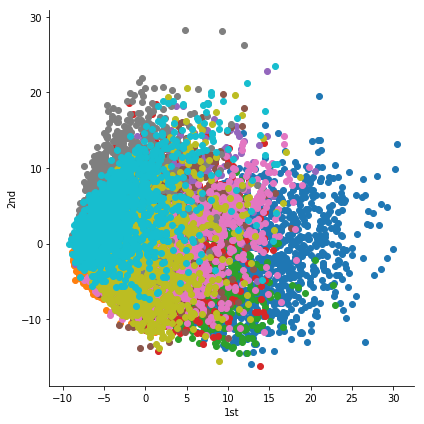

In [50]:
sns.FacetGrid(pca_df, hue="label", size = 6).map(plt.scatter,'1st','2nd')
plt.show()